In [54]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import warnings
from dateutil.relativedelta import relativedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
import sklearn.model_selection

%matplotlib inline

# warningを非表示
warnings.filterwarnings('ignore')

In [30]:
uselog = pd.read_csv('./chapter04/use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [31]:
customer = pd.read_csv('./chapter04/customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [32]:
customer_clustering = customer[["mean","median","max","min","membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [33]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)  #データの標準化

KMeans法によるクラスタリング

In [34]:
kmeans = KMeans(n_clusters=4,random_state=0)
clusters = kmeans.fit(customer_clustering_sc)

customer_clustering = customer_clustering.assign(cluster = clusters.labels_)
print(customer_clustering["cluster"].unique())

[3 2 0 1]


In [35]:
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [36]:
customer_clustering.columns = ["月内平均値","月内中央値","月内最大値","月内最小値","会員期間","cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,846,846,846,846,846
2,763,763,763,763,763
3,1249,1249,1249,1249,1249


In [37]:
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.524239,5.375187,8.745877,2.687406,14.843328
1,8.054608,8.039598,10.009456,6.160757,7.072104
2,3.054713,2.888598,4.756225,1.653997,9.263434
3,4.677494,4.671337,7.232986,2.153723,36.915933


In [38]:
X = customer_clustering_sc
pca = PCA(n_components=2) #主成分分析
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

In [39]:
pca_df.head()

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3


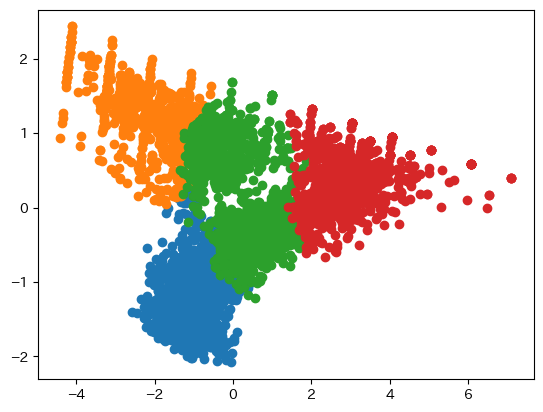

In [48]:
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]== i]
    plt.scatter(tmp[0],tmp[1])

In [41]:
customer_clustering.dtypes

月内平均値      float64
月内中央値      float64
月内最大値        int64
月内最小値        int64
会員期間         int64
cluster      int32
dtype: object

In [43]:
customer_clustering_temp.head()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,3,OA832399,XXXX,C01,F,...,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,3,PL270116,XXXXX,C01,M,...,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,3,OA974876,XXXXX,C01,M,...,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,3,HD024127,XXXXX,C01,F,...,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,3,HD661448,XXXXX,C03,F,...,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [46]:
customer_clustering_temp = pd.concat([customer_clustering,customer],axis=1)
customer_clustering_temp.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,785
1,0,1,549
2,1,0,827
3,1,1,19
4,2,1,763
5,3,0,1230
6,3,1,19


In [47]:
customer_clustering_temp.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,228
1,0,1,1106
2,1,0,52
3,1,1,794
4,2,0,497
5,2,1,266
6,3,0,2
7,3,1,1247


過去6ヶ月のデータを利用して来月の利用回数を予測する

回帰予測モデル

In [49]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_month = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_month.rename(columns={"log_id":"count"},inplace=True)
del uselog_month["usedate"]
uselog_month.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [50]:
year_months = list(uselog_month["年月"].unique()) 
predict_data = pd.DataFrame()
for i in range(6,len(year_months)):
    tmp = uselog_month.loc[uselog_month["年月"]== year_months[i]].copy()
    tmp.rename(columns={"count":"count_pred"},inplace=True)
    for j in range(1,7):
        tmp_before = uselog_month.loc[uselog_month["年月"]==year_months[i - j]].copy()
        del tmp_before["年月"]
        tmp_before.rename(columns={"count":"count_{}".format(j -1)},inplace=True)
        tmp = pd.merge(tmp,tmp_before,on="customer_id",how = "left")
    predict_data = pd.concat([predict_data,tmp],ignore_index=True)
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [51]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True) #Index初期化
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [52]:
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]],on = "customer_id",how="left")
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [53]:
predict_data["now_date"] = pd.to_datetime(predict_data["年月"],format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

predict_data["period"] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data.loc[i,"now_date"],predict_data.loc[i,"start_date"])
    predict_data.loc[i,"period"] = delta.years * 12 + delta.months
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [55]:
predict_data = predict_data.loc[predict_data["start_date"] >= pd.to_datetime("20180401")]

In [56]:
model = linear_model.LinearRegression()
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
y = predict_data["count_pred"]

X_train, X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,random_state=0) #訓練データとテストデータに分割
model.fit(X_train,y_train)

LinearRegression()

In [57]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6111525903215709
0.5964633323568842


モデルの評価には残差プロットもある

In [58]:
coef = pd.DataFrame({"feature_names":X.columns,"coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.359133
1,count_1,0.181937
2,count_2,0.151177
3,count_3,0.184593
4,count_4,0.076946
5,count_5,0.058731
6,period,0.047007


In [ ]:
x1 = [3,4,4,6,8,7,8]
x2 = [2,2,3,3,4,6,8]
x_pred = pd.DataFrame(data=[x1,x2],columns=["count_0","count_1","count_2","count_3","count_4","count_5","period"])
model.predict(x_pred)